In [ ]:
# Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as ply  
import pandas as pd 

In [ ]:
#importing dataset
data = pd.read_csv("day_wise.csv")

In [ ]:
data.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,1/22/2020,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,1/23/2020,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,1/24/2020,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,1/25/2020,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,1/26/2020,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
df = data.dropna()

In [ ]:
x = df.loc[:,['Active','Deaths']].values

In [ ]:
print(x)

[[    510      17]
 [    606      18]
 [    879      26]
 [   1353      42]
 [   2010      56]
 [   2784      82]
 [   5340     131]
 [   5908     133]
 [   7922     171]
 [   9495     213]
 [  11498     259]
 [  15966     362]
 [  18857     426]
 [  22585     492]
 [  26008     564]
 [  28750     634]
 [  31712     719]
 [  33792     806]
 [  36132     906]
 [  37906    1013]
 [  39145    1113]
 [  40594    1118]
 [  52905    1371]
 [  57554    1523]
 [  58197    1666]
 [  58790    1770]
 [  58996    1868]
 [  58908    2008]
 [  57513    2123]
 [  55962    2246]
 [  55990    2250]
 [  53661    2457]
 [  53519    2467]
 [  52180    2627]
 [  50348    2707]
 [  48826    2767]
 [  47305    2810]
 [  45238    2867]
 [  44056    2936]
 [  43492    2990]
 [  42500    3079]
 [  42406    3154]
 [  41672    3249]
 [  41752    3342]
 [  43550    3454]
 [  44999    3553]
 [  46377    3797]
 [  48294    3981]
 [  51128    4260]
 [  56136    4604]
 [  60260    4909]
 [  72243    5406]
 [  80562   

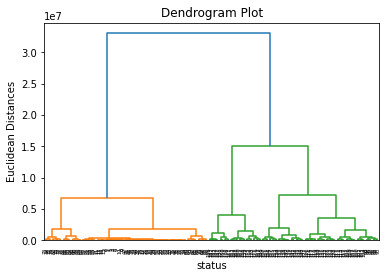

In [ ]:
import scipy.cluster.hierarchy as sch
dendo = sch.dendrogram(sch.linkage(x, method = 'ward'))

ply.title("Dendrogram Plot")
ply.ylabel("Euclidean Distances")
ply.xlabel("status")
ply.show()

In the above diagram, we see that the vertical distances that are not cutting their horizontal bars. According to this, the number of clusters will be 6(the vertical lines in this range).

So, the optimal number of clusters will be 6, and we will train the model in the next step, using the same.

In [ ]:
from scipy.spatial.distance import euclidean
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters= 3, affinity="euclidean", linkage = "ward")

In [ ]:
y_pred =  hc.fit_predict(x)

The AgglomerativeClustering class takes the following parameters:

n_clusters=6: It defines the number of clusters, and we have taken here 5 because it is the optimal number of clusters.

affinity='euclidean': It is a metric used to compute the linkage.

linkage='ward': It defines the linkage criteria, here we have used the "ward" linkage. This method is the popular linkage method that we have already used for creating the Dendrogram. It reduces the variance in each cluster.

In the last line, we have created the dependent variable y_pred to fit or train the model. It does train not only the model but also returns the clusters to which each data point belongs.

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


The y_pred shows the clusters value, which means the player id 1 belongs to the 4th cluster (as indexing starts from 0, so 3 means 4th cluster), the player id 4 belongs to 2nd cluster, and so on.

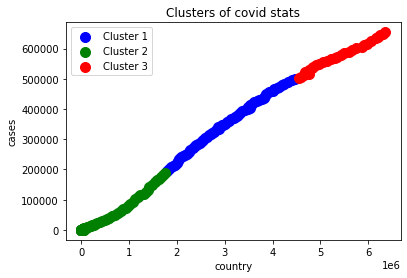

In [ ]:
#visulaizing the clusters  
ply.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
ply.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
ply.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
ply.title('Clusters of covid stats')  
ply.xlabel('country')  
ply.ylabel('cases')  
ply.legend()  
ply.show()  